# Interest-rate curves #
## 5. Term structures and their reference dates ##

### Setup ###

In [1]:
import QuantLib as ql

In [2]:
ql.Settings.instance().evaluationDate = ql.Date(3, ql.October, 2014)

### Specifying the reference date of a term structure ###

In [7]:
helpers = [ql.SwapRateHelper(ql.QuoteHandle(ql.SimpleQuote(rate / 100.0)),
                             ql.Period(*tenor), ql.TARGET(), ql.Annual, 
                             ql.Unadjusted, ql.Thirty360(ql.Thirty360.European), 
                             ql.Euribor6M())
           for tenor, rate in [((2, ql.Years), 0.201),
                               ((3, ql.Years), 0.258),
                               ((5, ql.Years), 0.464),
                               ((10, ql.Years), 1.151),
                               ((15, ql.Years), 1.588)]]

In [8]:
curve1 = ql.PiecewiseFlatForward(0, ql.TARGET(), helpers, ql.Actual360())

In [9]:
dates, rates = zip(*curve1.nodes())

In [12]:
list(zip(dates, rates))

[(Date(3,10,2014), 0.0019777694879293093),
 (Date(7,10,2016), 0.0019777694879293093),
 (Date(9,10,2017), 0.0036475517704509294),
 (Date(7,10,2019), 0.007660760701876805),
 (Date(7,10,2024), 0.018414773669420893),
 (Date(8,10,2029), 0.025311634328221498)]

In [13]:
curve2 = ql.ForwardCurve(dates, rates, ql.Actual360())

In [14]:
print(curve1.referenceDate(), 'to', curve1.maxDate())
print(curve2.referenceDate(), 'to', curve2.maxDate())

October 3rd, 2014 to October 8th, 2029
October 3rd, 2014 to October 8th, 2029


In [15]:
print(curve1.zeroRate(5.0, ql.Continuous))
print(curve2.zeroRate(5.0, ql.Continuous))

0.452196 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding


In [16]:
print(curve1.zeroRate(ql.Date(7, ql.September, 2019), ql.Actual360(), ql.Continuous))
print(curve2.zeroRate(ql.Date(7, ql.September, 2019), ql.Actual360(), ql.Continuous))

0.452196 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding


In [17]:
import matplotlib.pyplot as plot
import numpy

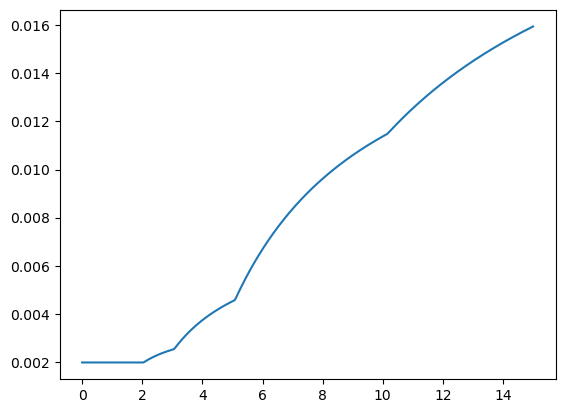

In [19]:
times = numpy.linspace(0.0, 15.0, 400)
rates = [curve1.zeroRate(t, ql.Continuous).rate() for t in times]
plot.plot(times, rates);

### Moving the evaluation date ###

In [20]:
ql.Settings.instance().evaluationDate = ql.Date(19, ql.September, 2014)

In [21]:
print(curve1.referenceDate(), 'to', curve1.maxDate())
print(curve2.referenceDate(), 'to', curve2.maxDate())

September 19th, 2014 to September 24th, 2029
October 3rd, 2014 to October 8th, 2029


In [22]:
print(curve1.zeroRate(5.0, ql.Continuous))
print(curve2.zeroRate(5.0, ql.Continuous))

0.452196 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding


In [23]:
print(curve1.zeroRate(ql.Date(7, ql.September, 2019), ql.Actual360(), ql.Continuous))
print(curve2.zeroRate(ql.Date(7, ql.September, 2019), ql.Actual360(), ql.Continuous))

0.454618 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding


### Notifications ###

In [25]:
def make_observer(i):
    def say():
        s = f"Observer {i} notified"
        print('-'*len(s))
        print(s)
        print('-'*len(s))
    return ql.Observer(say)
obs1 = make_observer(1)
obs2 = make_observer(2)

In [26]:
q1 = ql.SimpleQuote(1.0)
obs1.registerWith(q1)
q2 = ql.SimpleQuote(2.0)
obs2.registerWith(q2)
q3 = ql.SimpleQuote(3.0)
obs1.registerWith(q3)
obs2.registerWith(q3)

In [27]:
q1.setValue(1.5)

-------------------
Observer 1 notified
-------------------


In [28]:
q2.setValue(1.9)

-------------------
Observer 2 notified
-------------------


In [29]:
q3.setValue(3.1)

-------------------
Observer 2 notified
-------------------
-------------------
Observer 1 notified
-------------------


In [30]:
obs1.registerWith(curve1)
obs2.registerWith(curve2)

In [31]:
ql.Settings.instance().evaluationDate = ql.Date(23, ql.September, 2014)

-------------------
Observer 1 notified
-------------------
